# Importing libraries

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'keras'

In [2]:
forest_data = pd.read_csv('forestfires.csv')
forest_data


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest_data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [6]:
forest_data_corr = forest_data.corr()
forest_data_corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


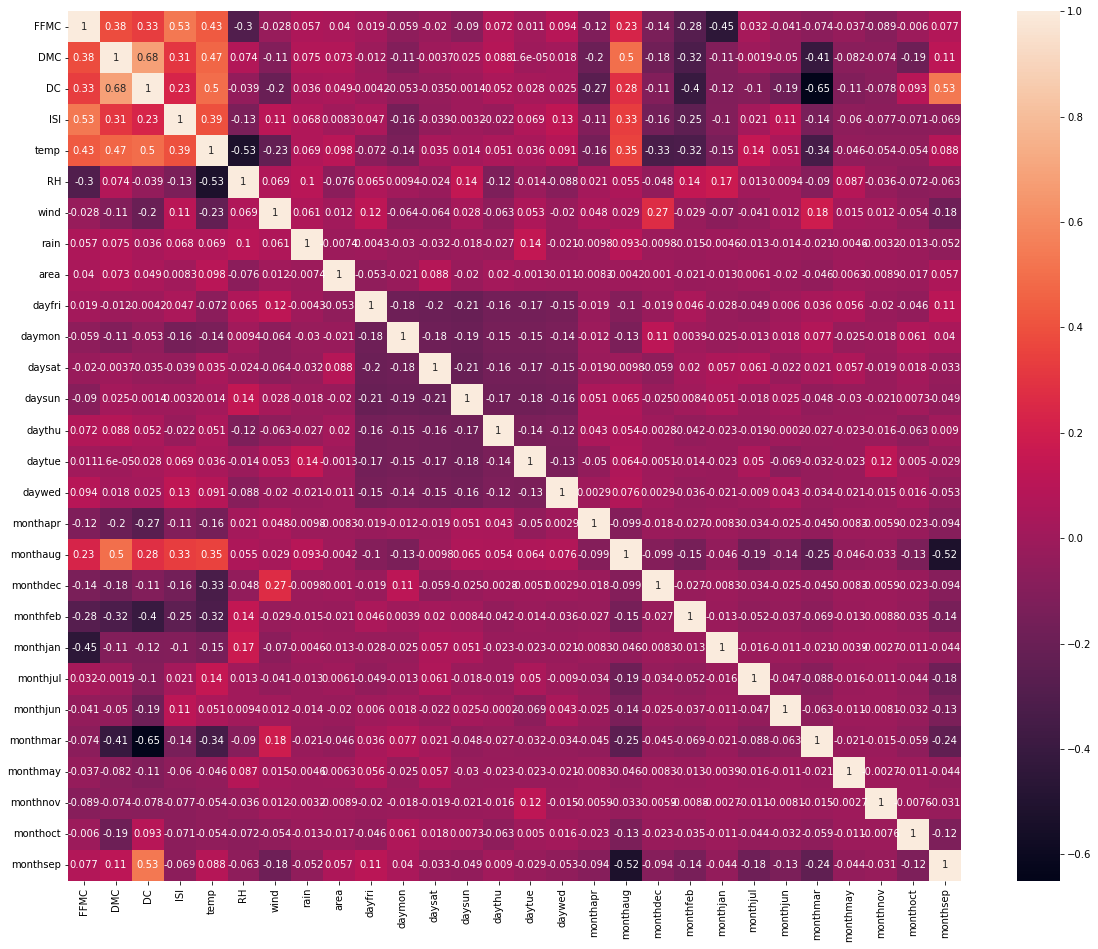

In [7]:
import seaborn as sns
plt.figure(figsize=(20,16))
sns.heatmap(forest_data_corr, annot = True)
None

In [8]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
forest_data['size_category']= label_encoder.fit_transform(forest_data['size_category'])

In [9]:
forest_data=forest_data.drop(columns=['month','day'],axis=1)
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [11]:
x = forest_data.iloc[:,0:-1]
y = forest_data['size_category']

In [12]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

# Artificial neural network model 

In [17]:
#create model
model = Sequential()
model.add(Dense(42, input_dim =28, activation = 'relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
#Complile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [19]:
#Fit the model
history = model.fit(x_train,y_train, validation_split=0.33,epochs=180,batch_size=28)

Epoch 1/180
10/10 [==============================] - 4s 92ms/step - loss: 4.2537 - accuracy: 0.6123 - val_loss: 2.4506 - val_accuracy: 0.6277
Epoch 2/180
10/10 [==============================] - 0s 15ms/step - loss: 2.1823 - accuracy: 0.4964 - val_loss: 1.6421 - val_accuracy: 0.7518
Epoch 3/180
10/10 [==============================] - 0s 14ms/step - loss: 1.2470 - accuracy: 0.5942 - val_loss: 0.9068 - val_accuracy: 0.7883
Epoch 4/180
10/10 [==============================] - 0s 13ms/step - loss: 1.0852 - accuracy: 0.6449 - val_loss: 0.5853 - val_accuracy: 0.6715
Epoch 5/180
10/10 [==============================] - 0s 12ms/step - loss: 0.7971 - accuracy: 0.7536 - val_loss: 0.8708 - val_accuracy: 0.4745
Epoch 6/180
10/10 [==============================] - 0s 13ms/step - loss: 0.7727 - accuracy: 0.7065 - val_loss: 0.3997 - val_accuracy: 0.8540
Epoch 7/180
10/10 [==============================] - 0s 12ms/step - loss: 0.5047 - accuracy: 0.7826 - val_loss: 0.4333 - val_accuracy: 0.8321
Epoch 

10/10 [==============================] - 0s 8ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 0.1476 - val_accuracy: 0.9416
Epoch 116/180
10/10 [==============================] - 0s 9ms/step - loss: 0.0372 - accuracy: 0.9891 - val_loss: 0.1456 - val_accuracy: 0.9343
Epoch 117/180
10/10 [==============================] - 0s 8ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.1834 - val_accuracy: 0.9270
Epoch 118/180
10/10 [==============================] - 0s 8ms/step - loss: 0.0366 - accuracy: 0.9964 - val_loss: 0.2389 - val_accuracy: 0.9270
Epoch 119/180
10/10 [==============================] - 0s 9ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.1628 - val_accuracy: 0.9270
Epoch 120/180
10/10 [==============================] - 0s 8ms/step - loss: 0.0527 - accuracy: 0.9783 - val_loss: 0.1860 - val_accuracy: 0.9270
Epoch 121/180
10/10 [==============================] - 0s 9ms/step - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.1529 - val_accuracy: 0.9343
Epoch 122/180

In [20]:
#evalute the model
score = model.evaluate(x,y)

17/17 [==============================] - 0s 4ms/step - loss: 0.0921 - accuracy: 0.9652


In [24]:
print("%s; %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy; 96.52%


In [25]:
# Visualizing training history
# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

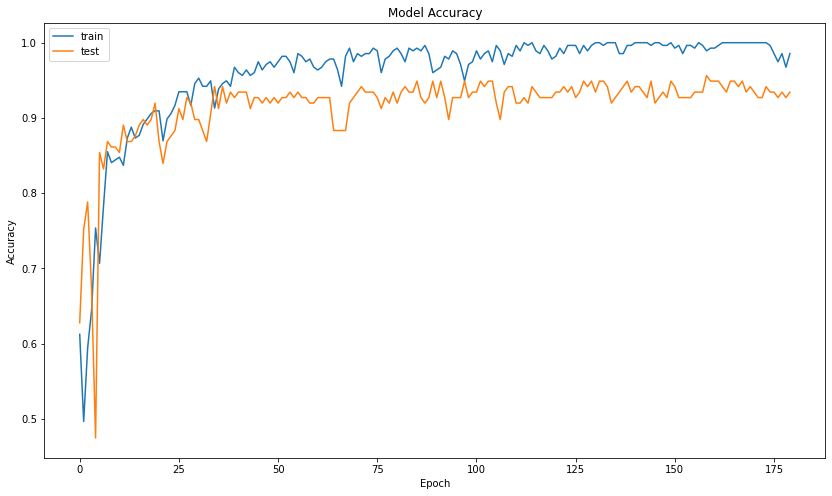

In [26]:
# summarize history for accuracy
from matplotlib import pyplot as plt
plt.figure(figsize=(14,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

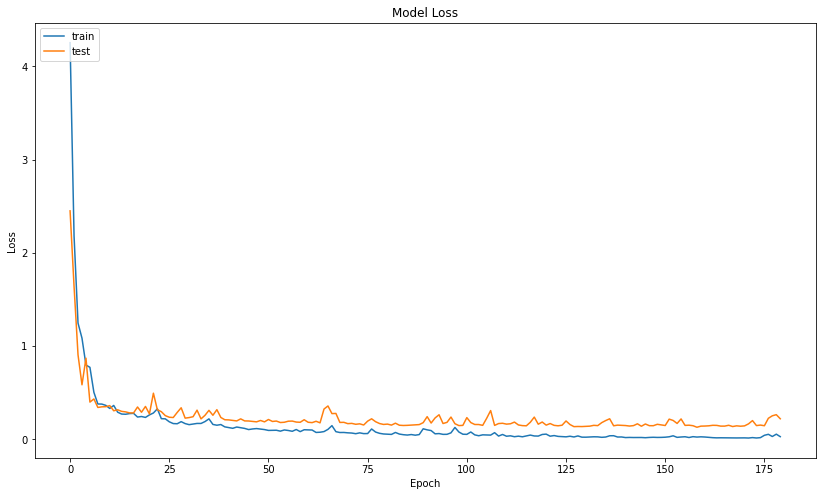

In [27]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Hyper parameter tuning

In [28]:
X =forest_data.iloc[:,0:-1]
Y =forest_data['size_category']

In [29]:
#standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [30]:
pd.DataFrame(X_standardized).describe().T

,count,mean,std,min,25%,50%,75%,max
0,517.0,-1.754024e-15,1.000969,-13.045818,-0.080635,0.173229,0.408960,1.007353
1,517.0,3.070830e-16,1.000969,-1.715608,-0.660665,-0.040203,0.492739,2.819865
2,517.0,7.387171e-17,1.000969,-2.179108,-0.444828,0.469119,0.669663,1.261610
3,517.0,-3.865380e-17,1.000969,-1.980578,-0.553595,-0.136477,0.390409,10.335381
4,517.0,2.005703e-16,1.000969,-2.876943,-0.584238,0.070821,0.674164,2.484195
5,517.0,3.362881e-16,1.000969,-1.796637,-0.692456,-0.140366,0.534411,3.417549
6,517.0,-2.676776e-16,1.000969,-2.021098,-0.736124,-0.009834,0.492982,3.007063
7,517.0,-2.841054e-16,1.000969,-0.073268,-0.073268,-0.073268,-0.073268,21.572284
8,517.0,-1.274502e-16,1.000969,-0.202020,-0.202020,-0.193843,-0.098709,16.951110
9,517.0,4.874674e-17,1.000969,-0.443576,-0.443576,-0.443576,-0.443576,2.254407


# Tuning of hyperparameters - Batch size and Epochs

In [31]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [34]:
# create model
def create_model():
 model = Sequential()
 model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
 model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
 model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

 adam=Adam(lr=0.01)
 model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
 return model

In [35]:
#create the model
model = KerasClassifier(build_fn= create_model,verbose = 0)
#Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of thr grid of the search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid= param_grid, verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.981 total time=   3.1s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.865 total time=   2.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.854 total time=   2.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.874 total time=   2.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.893 total time=   3.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.893 total time=   4.0s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.913 total time=   4.0s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.903 total time=   4.0s


# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [36]:
from keras.layers import Dropout
# Defining the model
def create_model(learning_rate,dropout_rate):
 model = Sequential()
 model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
 model.add(Dropout(dropout_rate))
 model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
 model.add(Dropout(dropout_rate))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr = learning_rate)
 model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
 return model
# Create the model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=40, verbose=0)
# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   1.8s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   1.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   1.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.709 total time=   2.5s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [37]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7946788668632507, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7325242638587952,0.15400213076804797 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7946788668632507,0.10783586058305387 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.792681097984314,0.14446814840786068 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7480582475662232,0.15473486793734148 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.72113516330719,0.11080465281818946 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7403472542762757,0.1421236411507357 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7538835048675537,0.15059188142714852 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [41]:
from keras.layers import Dropout
# Defining the model
def create_model(activation_function,init):
 model = Sequential()
 model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
 model.add(Dropout(0.1))
 model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
 model.add(Dropout(0.1))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr = 0.001)
 model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
 return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs=10)
# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.3s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   2.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   2.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   3.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   1.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.650 total time=   1.9s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.680 total time=   1.6s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.709 total time=   1.7s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   1.6s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.750 total time=   1.7s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.602 total time=   2.1s
[CV 4/5; 11/12] START activation_f

In [48]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.748152 using {'activation_function': 'linear', 'init': 'uniform'}
0.730583 (0.154351) with: {'activation_function': 'softmax', 'init': 'uniform'}
0.650971 (0.232809) with: {'activation_function': 'softmax', 'init': 'normal'}
0.658738 (0.227584) with: {'activation_function': 'softmax', 'init': 'zero'}
0.730583 (0.154351) with: {'activation_function': 'relu', 'init': 'uniform'}
0.730583 (0.154351) with: {'activation_function': 'relu', 'init': 'normal'}
0.730583 (0.154351) with: {'activation_function': 'relu', 'init': 'zero'}
0.736464 (0.129301) with: {'activation_function': 'tanh', 'init': 'uniform'}
0.744175 (0.139309) with: {'activation_function': 'tanh', 'init': 'normal'}
0.730583 (0.154351) with: {'activation_function': 'tanh', 'init': 'zero'}
0.748152 (0.107066) with: {'activation_function': 'linear', 'init': 'uniform'}
0.748058 (0.134951) with: {'activation_function': 'linear', 'init': 'normal'}
0.730583 (0.154351) with: {'activation_function': 'linear', 'init': 'zero'}


# Tuning of Hyperparameter :-Number of Neurons in activation layer

In [49]:
# Defining the model
def create_model(neuron1,neuron2):
 model = Sequential()
 model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation='linear'))
 model.add(Dropout(0.1))
 model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation='linear'))
 model.add(Dropout(0.1))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr = 0.001)
 model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
 return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs=10)
# Define the grid search parameters
neuron1 = [4,8,16]
neuron2 = [2,4,8]
# Make a dictionary of the grid search parameters
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.6s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   1.9s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.592 total time=   2.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.680 total time=   1.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.709 total time=   3.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [50]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.753977 using {'neuron1': 16, 'neuron2': 4}
0.746116 (0.137093) with: {'neuron1': 4, 'neuron2': 2}
0.748058 (0.136618) with: {'neuron1': 4, 'neuron2': 4}
0.748096 (0.125162) with: {'neuron1': 4, 'neuron2': 8}
0.730713 (0.113101) with: {'neuron1': 8, 'neuron2': 2}
0.738443 (0.116881) with: {'neuron1': 8, 'neuron2': 4}
0.746191 (0.117042) with: {'neuron1': 8, 'neuron2': 8}
0.734522 (0.127281) with: {'neuron1': 16, 'neuron2': 2}
0.753977 (0.104106) with: {'neuron1': 16, 'neuron2': 4}
0.752035 (0.104117) with: {'neuron1': 16, 'neuron2': 8}


# Training model with optimum values of Hyperparameters

In [51]:
from sklearn.metrics import classification_report, accuracy_score
# Defining the model
def create_model():
 model = Sequential()
 model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation ='relu'))
 model.add(Dropout(0.1))
 model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation ='relu'))
 model.add(Dropout(0.1))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay
 model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
 return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs=10)
# Fitting the model
model.fit(X_standardized,Y)
# Predicting using trained model
y_predict = model.predict(X_standardized)
# Printing the metrics
print(accuracy_score(Y,y_predict))

17/17 [==============================] - 0s 3ms/step
0.7562862669245648


# Hyper parameters 

In [52]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
 model = Sequential()
 model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation =activation_function))
 model.add(Dropout(dropout_rate))
 model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
 model.add(Dropout(dropout_rate))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr = learning_rate)
 model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
 return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]
# Make a dictionary of the grid search parameters
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
 activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [ ]:
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   2.3s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, lear

[CV 5/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   2.9s
[CV 1/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   2.4s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   2.4s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuro

[CV 5/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.874 total time=   2.3s
[CV 1/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.942 total time=   2.4s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.808 total time=   2.3s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuro

[CV 5/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.893 total time=   5.2s
[CV 1/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.971 total time=   3.5s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.779 total time=   4.1s
[CV 3/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, 

[CV 5/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.786 total time=   2.6s
[CV 1/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.952 total time=   3.4s
[CV 2/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.760 total time=   3.4s
[CV 3/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[

[CV 5/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.757 total time=   2.4s
[CV 1/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.952 total time=   2.4s
[CV 2/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.760 total time=   2.9s
[CV 3/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuro

[CV 5/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   2.6s
[CV 1/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   3.3s
[CV 2/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   2.5s
[CV 3/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuro

[CV 5/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   2.5s
[CV 1/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   2.5s
[CV 2/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   2.7s
[CV 3/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16,

[CV 5/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.864 total time=   2.4s
[CV 1/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.923 total time=   3.2s
[CV 2/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.798 total time=   2.7s
[CV 3/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 5/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.874 total time=   2.8s
[CV 1/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.952 total time=   2.4s
[CV 2/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.740 total time=   2.4s
[CV 3/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3

[CV 5/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.738 total time=   2.8s
[CV 1/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.971 total time=   2.4s
[CV 2/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.750 total time=   2.5s
[CV 3/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5

[CV 5/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.301 total time=   2.8s
[CV 1/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   2.3s
[CV 2/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   2.6s
[CV 3/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5

[CV 5/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   2.3s
[CV 1/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   2.3s
[CV 2/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   2.4s
[CV 3/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[C

[CV 5/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.699 total time=   2.4s
[CV 1/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   2.3s
[CV 2/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.750 total time=   2.3s
[CV 3/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 66/8

[CV 5/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.699 total time=   2.4s
[CV 1/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=   2.4s
[CV 2/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.750 total time=   2.4s
[CV 3/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5

[CV 5/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   2.4s
[CV 1/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   2.4s
[CV 2/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   2.5s
[CV 3/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 76/8748] E

[CV 5/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.699 total time=   2.6s
[CV 1/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=   2.7s
[CV 2/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   2.6s
[CV 3/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 81/8

[CV 5/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.718 total time=   6.6s
[CV 1/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.962 total time=   6.9s
[CV 2/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   6.7s
[CV 3/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8,

[CV 5/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.718 total time=   7.0s
[CV 1/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   7.2s
[CV 2/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.846 total time=   6.8s
[CV 3/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neu

[CV 5/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.864 total time=   7.7s
[CV 1/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   7.9s
[CV 2/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.846 total time=   7.0s
[CV 3/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuro

[CV 5/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.864 total time=   6.8s
[CV 1/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.913 total time=   6.9s
[CV 2/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.827 total time=   7.4s
[CV 3/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuro

[CV 5/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.786 total time=   7.9s
[CV 1/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.990 total time=   7.6s
[CV 2/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.731 total time=   7.7s
[CV 3/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, 

[CV 5/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.748 total time=   6.6s
[CV 1/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   7.2s
[CV 2/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   6.9s
[CV 3/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4,

[CV 5/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.718 total time=   6.8s
[CV 1/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.971 total time=   7.1s
[CV 2/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   6.8s
[CV 3/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuro

[CV 5/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.883 total time=   7.9s
[CV 1/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   8.6s
[CV 2/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.875 total time=   9.1s
[CV 3/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuro

[CV 5/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.854 total time=   8.4s
[CV 1/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=1.000 total time=   8.2s
[CV 2/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.856 total time=   8.2s
[CV 3/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16,

[CV 5/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.709 total time=   8.1s
[CV 1/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=   8.0s
[CV 2/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.808 total time=   8.1s
[CV 3/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[

[CV 5/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.786 total time=   8.5s
[CV 1/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   7.4s
[CV 2/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   5.9s
[CV 3/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


[CV 5/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   5.3s
[CV 1/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   5.6s
[CV 2/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   5.5s
[CV 3/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[

[CV 5/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.699 total time=   5.7s
[CV 1/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   5.0s
[CV 2/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.750 total time=   5.3s
[CV 3/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5

[CV 5/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.699 total time=   6.0s
[CV 1/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=   6.3s
[CV 2/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.750 total time=   5.5s
[CV 3/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[C

[CV 5/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.699 total time=   8.2s
[CV 1/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=   8.1s
[CV 2/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=   7.9s
[CV 3/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 156/

[CV 5/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=   9.1s
[CV 1/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=   8.3s
[CV 2/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   8.4s
[CV 3/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5

[CV 5/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.903 total time=  13.6s
[CV 1/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.942 total time=  13.4s
[CV 2/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.798 total time=  13.5s
[CV 3/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001

[CV 4/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.806 total time=  15.1s
[CV 5/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.893 total time=  16.4s
[CV 1/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.990 total time=  14.6s
[CV 2/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=

[CV 4/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.913 total time=  14.1s
[CV 5/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.913 total time=  13.3s
[CV 1/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.990 total time=  13.4s
[CV 2/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neur

[CV 4/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.845 total time=  15.3s
[CV 5/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.883 total time=  13.9s
[CV 1/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=1.000 total time=  13.9s
[CV 2/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neur

[CV 4/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.854 total time=   9.2s
[CV 5/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.709 total time=  12.0s
[CV 1/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.875 total time=   9.4s
[CV 2/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8,

[CV 4/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.893 total time=   9.7s
[CV 5/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.883 total time=   9.9s
[CV 1/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.981 total time=  10.7s
[CV 2/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neur

[CV 4/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.816 total time=   9.0s
[CV 5/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.874 total time=   9.1s
[CV 1/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.971 total time=   9.2s
[CV 2/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, ne

[CV 4/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.922 total time=  10.1s
[CV 5/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.893 total time=   9.8s
[CV 1/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   9.8s
[CV 2/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4,

[CV 4/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.854 total time=  15.1s
[CV 5/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.854 total time=  14.2s
[CV 1/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.971 total time=  16.1s
[CV 2/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuro